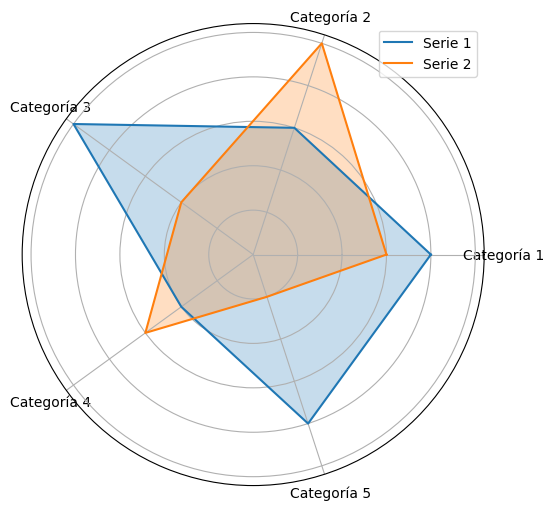

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# Datos de ejemplo
categorias = ['Categoría 1', 'Categoría 2', 'Categoría 3', 'Categoría 4', 'Categoría 5']
valores1 = [4, 3, 5, 2, 4]
valores2 = [3, 5, 2, 3, 1]

# Crear un arreglo de ángulos para los ejes del gráfico
angulos = np.linspace(0, 2*np.pi, len(categorias), endpoint=False).tolist()

# Cerrar el gráfico para formar un polígono
valores1.append(valores1[0])
valores2.append(valores2[0])
angulos.append(angulos[0])

# Crear la figura y los subplots
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

# Plotear los datos de la primera serie
ax.plot(angulos, valores1, label='Serie 1')
ax.fill(angulos, valores1, alpha=0.25)

# Plotear los datos de la segunda serie
ax.plot(angulos, valores2, label='Serie 2')
ax.fill(angulos, valores2, alpha=0.25)

# Personalizar el gráfico
ax.set_xticks(angulos[:-1])
ax.set_xticklabels(categorias)
ax.set_yticklabels([])  # Opcional: ocultar etiquetas de valores

# Agregar una leyenda
ax.legend()

# Mostrar el gráfico
plt.show()


In [3]:
!pip install statsmodels

In [4]:
import pandas as pd
import numpy as np
import glob
import os
from statsmodels.tsa.arima.model import ARIMA
import statsmodels.api as sm

In [5]:
df_quality_coffee=pd.read_csv('./coffee.csv')
df_quality_coffee.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 989 entries, 0 to 988
Data columns (total 23 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Location.Country                989 non-null    object 
 1   Location.Region                 953 non-null    object 
 2   Location.Altitude.Min           989 non-null    int64  
 3   Location.Altitude.Max           989 non-null    int64  
 4   Location.Altitude.Average       989 non-null    int64  
 5   Year                            989 non-null    int64  
 6   Data.Owner                      984 non-null    object 
 7   Data.Type.Species               989 non-null    object 
 8   Data.Type.Variety               864 non-null    object 
 9   Data.Type.Processing method     927 non-null    object 
 10  Data.Production.Number of bags  989 non-null    int64  
 11  Data.Production.Bag weight      989 non-null    float64
 12  Data.Scores.Aroma               989 

In [6]:
df_quality_coffee["Data.Scores.Total"]== 0

0      False
1      False
2      False
3      False
4      False
       ...  
984    False
985     True
986    False
987    False
988    False
Name: Data.Scores.Total, Length: 989, dtype: bool

In [7]:
df_quality_coffee["Data.Scores.Total"].max()

90.58

In [8]:
df_quality_coffee[df_quality_coffee['Location.Country']].count()

KeyError: "None of [Index(['United States', 'Brazil', 'Brazil', 'Ethiopia', 'Ethiopia',\n       'United States', 'Indonesia', 'Ethiopia', 'Ethiopia', 'Haiti',\n       ...\n       'Nicaragua', 'Kenya', 'Guatemala', 'Guatemala', 'Honduras', 'Guatemala',\n       'Honduras', 'India', 'India', 'Honduras'],\n      dtype='object', length=989)] are in the [columns]"

In [ ]:
df_quality_coffee.head()

,Location.Country,Location.Region,Location.Altitude.Min,Location.Altitude.Max,Location.Altitude.Average,Year,Data.Owner,Data.Type.Species,Data.Type.Variety,Data.Type.Processing method,...,Data.Scores.Flavor,Data.Scores.Aftertaste,Data.Scores.Acidity,Data.Scores.Body,Data.Scores.Balance,Data.Scores.Uniformity,Data.Scores.Sweetness,Data.Scores.Moisture,Data.Scores.Total,Data.Color
0,United States,kona,0,0,0,2010,kona pacific farmers cooperative,Arabica,NaN,NaN,...,8.42,8.08,7.75,7.67,7.83,10.0,10.0,0.00,86.25,Unknown
1,Brazil,sul de minas - carmo de minas,12,12,12,2010,jacques pereira carneiro,Arabica,Yellow Bourbon,NaN,...,7.92,7.92,7.75,8.33,8.00,10.0,10.0,0.08,86.17,Unknown
2,Brazil,sul de minas - carmo de minas,12,12,12,2010,jacques pereira carneiro,Arabica,Yellow Bourbon,NaN,...,7.92,8.00,7.75,7.92,8.00,10.0,10.0,0.01,86.17,Unknown
3,Ethiopia,sidamo,0,0,0,2010,ethiopia commodity exchange,Arabica,NaN,NaN,...,8.00,7.83,8.00,7.92,7.83,10.0,10.0,0.00,85.08,Unknown
4,Ethiopia,sidamo,0,0,0,2010,ethiopia commodity exchange,Arabica,NaN,NaN,...,7.83,7.58,8.00,7.83,7.50,10.0,10.0,0.10,83.83,Unknown


In [ ]:
score_cero= df_quality_coffee[df_quality_coffee['Data.Scores.Total']== 0]
score_cero

,Location.Country,Location.Region,Location.Altitude.Min,Location.Altitude.Max,Location.Altitude.Average,Year,Data.Owner,Data.Type.Species,Data.Type.Variety,Data.Type.Processing method,...,Data.Scores.Flavor,Data.Scores.Aftertaste,Data.Scores.Acidity,Data.Scores.Body,Data.Scores.Balance,Data.Scores.Uniformity,Data.Scores.Sweetness,Data.Scores.Moisture,Data.Scores.Total,Data.Color
985,Honduras,comayagua,1400,1400,1400,2017,bismarck castro,Arabica,Caturra,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.12,0.0,Green


In [ ]:
df_quality_coffee[df_quality_coffee['Data.Scores.Total']> 89]


,Location.Country,Location.Region,Location.Altitude.Min,Location.Altitude.Max,Location.Altitude.Average,Year,Data.Owner,Data.Type.Species,Data.Type.Variety,Data.Type.Processing method,...,Data.Scores.Flavor,Data.Scores.Aftertaste,Data.Scores.Acidity,Data.Scores.Body,Data.Scores.Balance,Data.Scores.Uniformity,Data.Scores.Sweetness,Data.Scores.Moisture,Data.Scores.Total,Data.Color
530,Ethiopia,guji-hambela,1950,2200,2075,2014,metad plc,Arabica,NaN,Washed / Wet,...,8.83,8.67,8.75,8.50,8.42,10.0,10.0,0.12,90.58,Green
531,Ethiopia,guji-hambela,1950,2200,2075,2014,metad plc,Arabica,Other,Washed / Wet,...,8.67,8.50,8.58,8.42,8.42,10.0,10.0,0.12,89.92,Green


In [ ]:
df_quality_coffee.describe()

,Location.Altitude.Min,Location.Altitude.Max,Location.Altitude.Average,Year,Data.Production.Number of bags,Data.Production.Bag weight,Data.Scores.Aroma,Data.Scores.Flavor,Data.Scores.Aftertaste,Data.Scores.Acidity,Data.Scores.Body,Data.Scores.Balance,Data.Scores.Uniformity,Data.Scores.Sweetness,Data.Scores.Moisture,Data.Scores.Total
count,989.000000,989.000000,989.000000,989.000000,989.000000,989.000000,989.000000,989.000000,989.000000,989.000000,989.000000,989.000000,989.000000,989.000000,989.000000,989.000000
mean,1640.076845,1675.929221,1657.998989,2013.549039,151.761375,210.491937,7.572831,7.515410,7.387472,7.539697,7.506309,7.500344,9.823893,9.830313,0.093903,81.972133
std,9192.519762,9191.957731,9192.058989,1.658883,125.665490,1666.707294,0.396796,0.420677,0.425284,0.399370,0.391481,0.425055,0.593888,0.691316,0.044666,3.859562
min,0.000000,0.000000,0.000000,2010.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,905.000000,950.000000,950.000000,2012.000000,15.000000,1.000000,7.420000,7.330000,7.250000,7.330000,7.330000,7.330000,10.000000,10.000000,0.100000,81.080000
50%,1300.000000,1310.000000,1300.000000,2013.000000,170.000000,60.000000,7.580000,7.500000,7.420000,7.580000,7.500000,7.500000,10.000000,10.000000,0.110000,82.500000
75%,1550.000000,1600.000000,1600.000000,2015.000000,275.000000,69.000000,7.750000,7.750000,7.580000,7.750000,7.670000,7.750000,10.000000,10.000000,0.120000,83.580000
max,190164.000000,190164.000000,190164.000000,2018.000000,600.000000,19200.000000,8.750000,8.830000,8.670000,8.750000,8.500000,8.580000,10.000000,10.000000,0.280000,90.580000


In [ ]:
df_quality_coffee[(df_quality_coffee["Location.Country"]== "Colombia")].head(2)

,Location.Country,Location.Region,Location.Altitude.Min,Location.Altitude.Max,Location.Altitude.Average,Year,Data.Owner,Data.Type.Species,Data.Type.Variety,Data.Type.Processing method,...,Data.Scores.Flavor,Data.Scores.Aftertaste,Data.Scores.Acidity,Data.Scores.Body,Data.Scores.Balance,Data.Scores.Uniformity,Data.Scores.Sweetness,Data.Scores.Moisture,Data.Scores.Total,Data.Color
25,Colombia,la plata,1600,1950,1775,2011,racafe & cia s.c.a,Arabica,Caturra,Washed / Wet,...,7.67,7.58,7.50,7.67,7.42,10.0,10.0,0.12,83.00,Bluish-Green
28,Colombia,huila,1750,1750,1750,2011,exportadora de cafe condor s.a,Arabica,Caturra,Washed / Wet,...,7.58,7.17,7.58,7.42,7.58,10.0,10.0,0.00,82.42,Green


In [ ]:
df_quality_coffee[(df_quality_coffee["Location.Country"]== "Brazil")].head(2)

,Location.Country,Location.Region,Location.Altitude.Min,Location.Altitude.Max,Location.Altitude.Average,Year,Data.Owner,Data.Type.Species,Data.Type.Variety,Data.Type.Processing method,...,Data.Scores.Flavor,Data.Scores.Aftertaste,Data.Scores.Acidity,Data.Scores.Body,Data.Scores.Balance,Data.Scores.Uniformity,Data.Scores.Sweetness,Data.Scores.Moisture,Data.Scores.Total,Data.Color
1,Brazil,sul de minas - carmo de minas,12,12,12,2010,jacques pereira carneiro,Arabica,Yellow Bourbon,NaN,...,7.92,7.92,7.75,8.33,8.0,10.0,10.0,0.08,86.17,Unknown
2,Brazil,sul de minas - carmo de minas,12,12,12,2010,jacques pereira carneiro,Arabica,Yellow Bourbon,NaN,...,7.92,8.00,7.75,7.92,8.0,10.0,10.0,0.01,86.17,Unknown


### Vasos de 12oz 1.300.000 vasos de agua dar de esta medida 

### Carga de los CSV de producción 

In [ ]:
Production=pd.read_excel('./1a - Total production (1).xlsx')

c:\Users\conod\miniconda3\envs\prueba_3\lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


In [ ]:
Production

,Total production by all exporting countries,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31
0,In thousand 60kg bags,NaN,3020.7,NaN,NaN,3020700,NaN,181242,181242.00,3020.7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Crop year,NaN,1990/91,1991/92,1992/93,1993/94,1994/95,1995/96,1996/97,1997/98,...,2010/11,2011/12,2012/13,2013/14,2014/15,2015/16,2016/17,2017/18,2018/19,2019/20
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,April group,NaN,40795.2926,42529.5454,46868.2042,40166.7591,39990.3663,29395.9601,44297.8201,39475.8391,...,71811.3709,64395.2131,75895.881,74494.0133,69873.1443,71331.7881,75507.8515,70324.4647,81707.9885,76075.7437
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62,Viet Nam,(R/A),1310.288,1437.848,2340.447,3020.216,3631.609,3970.086,5752.481,6978.942,...,19999.9999,26499.6111,23402.1057,27609.7814,27240.5219,31090.0419,27819.1762,33432.499,30283.0748,30487.1644
63,Yemen,(A),0,0,0,0,0,0,0,0,...,161.1675,185.0677,187.5251,187.2981,178.3814,156.246,143.4533,132.1281,85.5762,91.4278
64,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
65,Total,NaN,93230.0596,101266.6844,98524.0942,91761.0531,93313.7693,87320.8691,103307.8761,99887.1611,...,140077.5378,141327.3877,151183.5121,153910.3398,150301.6726,156126.4745,162319.9801,163693.1027,172460.8203,165053.0157


Vamos a hacer la prueba de una serie temporal con SARIMAX basandonos en los datos de producción por pais que tenemos 

In [ ]:
modelo=pd.read_excel('./Produccion_final.xlsx')

In [ ]:
modelo.head(2)

,País,Varietales,1990/91,1991/92,1992/93,1993/94,1994/95,1995/96,1996/97,1997/98,...,2011/12,2012/13,2013/14,2014/15,2015/16,2016/17,2017/18,2018/19,2019/20,Total_produccion
0,Angola,Robusta/Arabica,3020.70,4759.86,4651.2,1956.48,4608.12,3726.54,4255.50,3859.80,...,1722.90,1967.40,2096.10,2364.3,2430.90,2689.80,2100.36,2514.16,3110.51,81946.95
1,Bolivia (Plurinational State of),Arabica,7366.62,6212.16,7214.1,3049.38,7016.64,8549.10,7474.74,8443.14,...,7910.12,6316.87,7194.73,5992.6,5053.15,4679.01,5028.67,4954.12,4875.92,206970.18


In [ ]:
# Obtener las columnas de años
columnas_años = modelo.columns[2:-1]  # Ignora la primera columna 'País' y la última columna 'Total_produccion'

# Crear un diccionario de mapeo para los nuevos nombres de las columnas
nuevos_nombres = {columna: columna.split('/')[0] for columna in columnas_años}

# Renombrar las columnas
modelo.rename(columns=nuevos_nombres, inplace=True)
modelo


,País,Varietales,1990,1991,1992,1993,1994,1995,1996,1997,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,Total_produccion
0,Angola,Robusta/Arabica,3020.70,4759.86,4651.20,1956.48,4608.12,3726.54,4255.50,3859.80,...,1722.90,1967.40,2096.10,2364.30,2430.90,2689.80,2100.36,2514.16,3110.51,8.194695e+04
1,Bolivia (Plurinational State of),Arabica,7366.62,6212.16,7214.10,3049.38,7016.64,8549.10,7474.74,8443.14,...,7910.12,6316.87,7194.73,5992.60,5053.15,4679.01,5028.67,4954.12,4875.92,2.069702e+05
2,Brazil,Arabica/Robusta,1637137.72,1637609.60,2076201.25,1690018.72,1691522.82,1083612.13,1751804.58,1568880.24,...,2915509.73,3325080.07,3281337.98,3198286.01,3172235.26,3407290.70,3164389.07,3907847.98,3492642.76,7.508294e+07
3,Burundi,Arabica/Robusta,29243.58,40031.94,37214.28,23601.24,39848.58,26038.80,24058.14,14987.10,...,12247.97,24357.69,9793.06,14853.00,16167.46,11784.77,12126.47,12260.35,16348.13,6.237818e+05
4,Ecuador,Arabica/Robusta,90228.90,127429.44,71128.80,124140.42,142545.96,113293.98,119574.84,71439.78,...,49524.86,49686.14,39932.70,38640.67,38669.56,38693.07,37414.46,29760.01,33536.11,1.900354e+06
5,Indonesia,Robusta/Arabica,446482.98,509591.76,334168.68,404597.28,322072.68,274405.74,493235.04,457246.68,...,413335.40,784202.32,774056.96,656776.64,755128.51,692461.60,651138.92,577055.65,685976.55,1.540498e+07
6,Madagascar,Robusta,58946.82,55950.78,67301.04,26511.54,38482.32,47100.54,50940.48,37428.24,...,35091.17,29982.56,35068.55,30087.26,24853.92,27165.40,24251.54,22762.61,22998.75,1.045593e+06
7,Malawi,Arabica,6277.68,7457.16,8229.66,3726.66,5046.72,5474.10,2919.00,3649.20,...,1549.58,1369.57,1667.66,1482.59,1272.09,1170.96,868.22,771.94,962.59,8.225003e+04
8,Papua New Guinea,Arabica/Robusta,57770.46,44808.96,54006.66,61168.86,68319.54,60141.78,65360.88,64441.26,...,84831.27,42989.28,50121.56,47853.85,42718.91,70268.69,44036.29,55822.14,45103.26,1.803086e+06
9,Paraguay,Arabica,7837.62,4779.18,3257.46,3991.65,1515.86,1575.23,1850.59,2960.47,...,1201.17,1200.39,1201.91,1201.17,1200.00,1200.62,1200.08,1200.81,1200.23,6.215188e+04


In [ ]:
model_4

,Angola,Bolivia (Plurinational State of),Brazil,Burundi,Ecuador,Indonesia,Madagascar,Malawi,Papua New Guinea,Paraguay,...,Panama,Sierra Leone,Sri Lanka,Thailand,Togo,Trinidad & Tobago,Uganda,Venezuela,Viet Nam,Yemen
1990,3020.70,7366.62,1637137.72,29243.58,90228.90,446482.98,58946.82,6277.68,57770.46,7837.62,...,12899.22,2566.98,5752.20,45421.02,9678.48,874.86,117300.54,67348.62,78617.28,0.00
1991,4759.86,6212.16,1637609.60,40031.94,127429.44,509591.76,55950.78,7457.16,44808.96,4779.18,...,11551.92,3262.74,4892.94,88136.16,25959.12,1067.52,125280.06,56442.24,86270.88,0.00
1992,4651.20,7214.10,2076201.25,37214.28,71128.80,334168.68,67301.04,8229.66,54006.66,3257.46,...,11818.68,2345.04,3190.86,75296.70,5138.88,859.68,131104.44,72917.88,140426.82,0.00
1993,1956.48,3049.38,1690018.72,23601.24,124140.42,404597.28,26511.54,3726.66,61168.86,3991.65,...,8523.96,2247.06,3227.40,76512.06,11696.34,964.74,188502.36,79972.86,181212.96,0.00
1994,4608.12,7016.64,1691522.82,39848.58,142545.96,322072.68,38482.32,5046.72,68319.54,1515.86,...,14898.78,4364.28,2546.88,83948.10,10577.76,1106.10,143565.18,59339.76,217896.54,0.00
1995,3726.54,8549.10,1083612.13,26038.80,113293.98,274405.74,47100.54,5474.10,60141.78,1575.23,...,12566.88,2626.08,2135.70,79033.56,5064.06,1057.74,194615.04,87993.24,238205.16,0.00
1996,4255.50,7474.74,1751804.58,24058.14,119574.84,493235.04,50940.48,2919.00,65360.88,1850.59,...,12644.52,2454.60,2219.94,84214.86,17435.16,1091.28,205123.44,72369.72,345148.86,0.00
1997,3859.80,8443.14,1568880.24,14987.10,71439.78,457246.68,37428.24,3649.20,64441.26,2960.47,...,13048.14,2980.74,3455.04,77584.56,13264.68,1163.52,206392.08,57077.10,418736.52,0.00
1998,5120.64,8279.10,2205651.20,29519.52,72358.08,437757.30,59507.94,3859.26,81128.94,1904.41,...,11519.76,1612.92,2744.28,54959.16,19289.16,1021.08,203150.34,95836.74,423103.32,4122.04
1999,3296.34,9462.12,2854668.39,21033.00,71860.99,393423.97,25639.02,3540.00,83223.11,1138.36,...,9982.86,3541.20,1902.96,76370.27,15768.48,1013.40,171746.82,82010.10,697854.83,3634.74


In [ ]:
modelo_2=modelo.drop(modelo.index[-1])

In [ ]:
# Establecer la primera columna como índice y transponer el DataFrame
model_4 = modelo_2.set_index(modelo_2.columns[0]).T

# Reiniciar los nombres de las columnas
model_4.columns.name = None

In [ ]:
model_4=model_4.drop(model_4.index[0])

In [ ]:
model_4=model_4.drop(model_4.index[-1])

In [ ]:
model_4 = model_4.astype(str)

In [ ]:
model_4=model_4.apply(pd.to_numeric)
model_4.info()


<class 'pandas.core.frame.DataFrame'>
Index: 30 entries, 1990 to 2019
Data columns (total 55 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Angola                            30 non-null     float64
 1   Bolivia (Plurinational State of)  30 non-null     float64
 2   Brazil                            30 non-null     float64
 3   Burundi                           30 non-null     float64
 4   Ecuador                           30 non-null     float64
 5   Indonesia                         30 non-null     float64
 6   Madagascar                        30 non-null     float64
 7   Malawi                            30 non-null     float64
 8   Papua New Guinea                  30 non-null     float64
 9   Paraguay                          30 non-null     float64
 10  Peru                              30 non-null     float64
 11  Rwanda                            30 non-null     float64
 12  Timor-Lest

In [ ]:
series=model_4[:]
series

,Angola,Bolivia (Plurinational State of),Brazil,Burundi,Ecuador,Indonesia,Madagascar,Malawi,Papua New Guinea,Paraguay,...,Panama,Sierra Leone,Sri Lanka,Thailand,Togo,Trinidad & Tobago,Uganda,Venezuela,Viet Nam,Yemen
1990,3020.70,7366.62,1637137.72,29243.58,90228.90,446482.98,58946.82,6277.68,57770.46,7837.62,...,12899.22,2566.98,5752.20,45421.02,9678.48,874.86,117300.54,67348.62,78617.28,0.00
1991,4759.86,6212.16,1637609.60,40031.94,127429.44,509591.76,55950.78,7457.16,44808.96,4779.18,...,11551.92,3262.74,4892.94,88136.16,25959.12,1067.52,125280.06,56442.24,86270.88,0.00
1992,4651.20,7214.10,2076201.25,37214.28,71128.80,334168.68,67301.04,8229.66,54006.66,3257.46,...,11818.68,2345.04,3190.86,75296.70,5138.88,859.68,131104.44,72917.88,140426.82,0.00
1993,1956.48,3049.38,1690018.72,23601.24,124140.42,404597.28,26511.54,3726.66,61168.86,3991.65,...,8523.96,2247.06,3227.40,76512.06,11696.34,964.74,188502.36,79972.86,181212.96,0.00
1994,4608.12,7016.64,1691522.82,39848.58,142545.96,322072.68,38482.32,5046.72,68319.54,1515.86,...,14898.78,4364.28,2546.88,83948.10,10577.76,1106.10,143565.18,59339.76,217896.54,0.00
1995,3726.54,8549.10,1083612.13,26038.80,113293.98,274405.74,47100.54,5474.10,60141.78,1575.23,...,12566.88,2626.08,2135.70,79033.56,5064.06,1057.74,194615.04,87993.24,238205.16,0.00
1996,4255.50,7474.74,1751804.58,24058.14,119574.84,493235.04,50940.48,2919.00,65360.88,1850.59,...,12644.52,2454.60,2219.94,84214.86,17435.16,1091.28,205123.44,72369.72,345148.86,0.00
1997,3859.80,8443.14,1568880.24,14987.10,71439.78,457246.68,37428.24,3649.20,64441.26,2960.47,...,13048.14,2980.74,3455.04,77584.56,13264.68,1163.52,206392.08,57077.10,418736.52,0.00
1998,5120.64,8279.10,2205651.20,29519.52,72358.08,437757.30,59507.94,3859.26,81128.94,1904.41,...,11519.76,1612.92,2744.28,54959.16,19289.16,1021.08,203150.34,95836.74,423103.32,4122.04
1999,3296.34,9462.12,2854668.39,21033.00,71860.99,393423.97,25639.02,3540.00,83223.11,1138.36,...,9982.86,3541.20,1902.96,76370.27,15768.48,1013.40,171746.82,82010.10,697854.83,3634.74


In [ ]:
columnas=series.columns
for columna in columnas:
    # Extraer la columna de interés como variable endógena
    endog = series[columna]

In [ ]:
# El problema lo tengo en el Bucle for que solo esta tomando Angola 

columnas=series.columns
endog_todas=pd.Series() #Creamos una serie vacía para que guarde cada una de las series de cada columna 
for columna in columnas:
    # Extraer la columna de interés como variable endógena
    endog_todas = endog_todas.add(series[columna], fill_value=0)

In [ ]:
model = sm.tsa.SARIMAX(endog, order=(1, 0, 1), seasonal_order=(1, 0, 1, 12))

c:\Users\conod\miniconda3\envs\prueba_3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
c:\Users\conod\miniconda3\envs\prueba_3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)


In [ ]:
model_fit = model.fit()

c:\Users\conod\miniconda3\envs\prueba_3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\Users\conod\miniconda3\envs\prueba_3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [ ]:

predictions = model_fit.predict(start='2020-12-31', end='2050-12-31')

In [ ]:
predictions

2021-01-01    5307.553139
2022-01-01    4640.231733
2023-01-01    4332.958079
2024-01-01    4092.209796
2025-01-01    3894.418430
2026-01-01    3767.142899
2027-01-01    3044.120087
2028-01-01    2873.953555
2029-01-01    2771.788047
2030-01-01    2837.191430
2031-01-01    2684.679148
2032-01-01    2454.348980
2033-01-01    2687.667952
2034-01-01    2188.197348
2035-01-01    1988.658475
2036-01-01    1842.930466
2037-01-01    1731.313202
2038-01-01    1676.987199
2039-01-01    1121.189314
2040-01-01    1027.368929
2041-01-01     988.914021
2042-01-01    1089.393917
2043-01-01    1005.539544
2044-01-01     854.910758
2045-01-01    1091.713005
2046-01-01     712.486075
2047-01-01     583.470211
2048-01-01     498.278481
2049-01-01     440.432188
2050-01-01     429.417123
2051-01-01      -3.386118
Freq: AS-JAN, Name: predicted_mean, dtype: float64

In [ ]:
import matplotlib.pyplot as plt

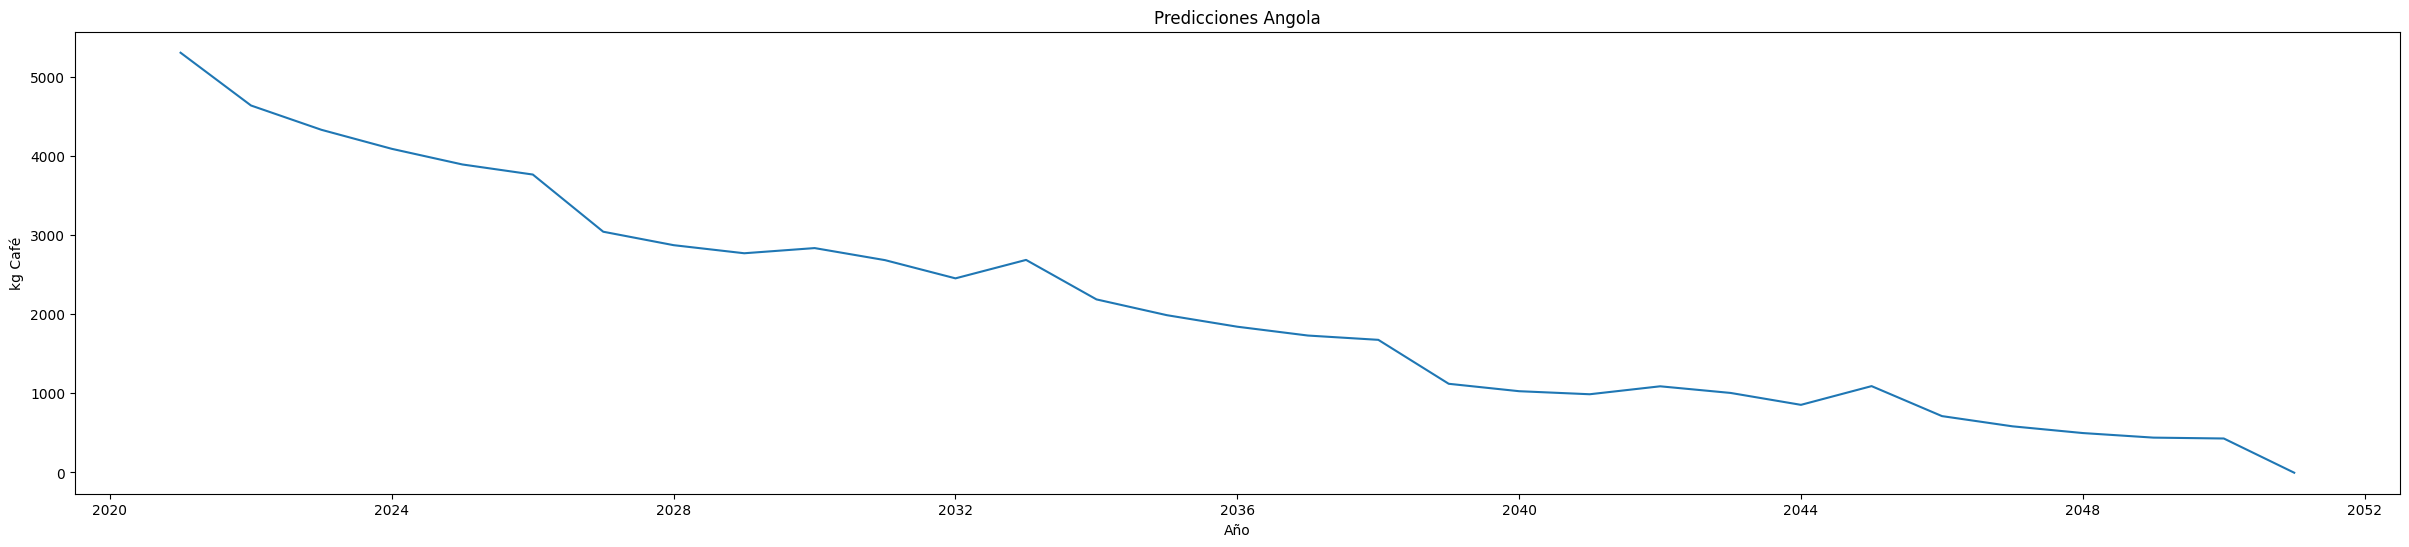

In [ ]:
# Graficamos la predicción - confirmamos que solo esta considerando la primera columna 
plt.figure(figsize=(30, 6))
plt.plot(predictions.index, predictions.values)
plt.xlabel('Año')
plt.ylabel('kg Café')
plt.title('Predicciones Angola')
plt.show()

In [ ]:
series_2=model_4[:]
series_2

,Angola,Bolivia (Plurinational State of),Brazil,Burundi,Ecuador,Indonesia,Madagascar,Malawi,Papua New Guinea,Paraguay,...,Panama,Sierra Leone,Sri Lanka,Thailand,Togo,Trinidad & Tobago,Uganda,Venezuela,Viet Nam,Yemen
1990,3020.70,7366.62,1637137.72,29243.58,90228.90,446482.98,58946.82,6277.68,57770.46,7837.62,...,12899.22,2566.98,5752.20,45421.02,9678.48,874.86,117300.54,67348.62,78617.28,0.00
1991,4759.86,6212.16,1637609.60,40031.94,127429.44,509591.76,55950.78,7457.16,44808.96,4779.18,...,11551.92,3262.74,4892.94,88136.16,25959.12,1067.52,125280.06,56442.24,86270.88,0.00
1992,4651.20,7214.10,2076201.25,37214.28,71128.80,334168.68,67301.04,8229.66,54006.66,3257.46,...,11818.68,2345.04,3190.86,75296.70,5138.88,859.68,131104.44,72917.88,140426.82,0.00
1993,1956.48,3049.38,1690018.72,23601.24,124140.42,404597.28,26511.54,3726.66,61168.86,3991.65,...,8523.96,2247.06,3227.40,76512.06,11696.34,964.74,188502.36,79972.86,181212.96,0.00
1994,4608.12,7016.64,1691522.82,39848.58,142545.96,322072.68,38482.32,5046.72,68319.54,1515.86,...,14898.78,4364.28,2546.88,83948.10,10577.76,1106.10,143565.18,59339.76,217896.54,0.00
1995,3726.54,8549.10,1083612.13,26038.80,113293.98,274405.74,47100.54,5474.10,60141.78,1575.23,...,12566.88,2626.08,2135.70,79033.56,5064.06,1057.74,194615.04,87993.24,238205.16,0.00
1996,4255.50,7474.74,1751804.58,24058.14,119574.84,493235.04,50940.48,2919.00,65360.88,1850.59,...,12644.52,2454.60,2219.94,84214.86,17435.16,1091.28,205123.44,72369.72,345148.86,0.00
1997,3859.80,8443.14,1568880.24,14987.10,71439.78,457246.68,37428.24,3649.20,64441.26,2960.47,...,13048.14,2980.74,3455.04,77584.56,13264.68,1163.52,206392.08,57077.10,418736.52,0.00
1998,5120.64,8279.10,2205651.20,29519.52,72358.08,437757.30,59507.94,3859.26,81128.94,1904.41,...,11519.76,1612.92,2744.28,54959.16,19289.16,1021.08,203150.34,95836.74,423103.32,4122.04
1999,3296.34,9462.12,2854668.39,21033.00,71860.99,393423.97,25639.02,3540.00,83223.11,1138.36,...,9982.86,3541.20,1902.96,76370.27,15768.48,1013.40,171746.82,82010.10,697854.83,3634.74


In [ ]:
columnas=series_2.columns
for columna in columnas:
    # Extraer la columna de interés como variable endógena
    endog_2 = series_2['Brazil']

In [ ]:
# endog_2 = series[]

In [ ]:
model = sm.tsa.SARIMAX(endog_2, order=(1, 0, 1), seasonal_order=(1, 0, 1, 12))

c:\Users\conod\miniconda3\envs\prueba_3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
c:\Users\conod\miniconda3\envs\prueba_3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)


In [ ]:
model_fit_2 = model.fit()
predictions_2 = model_fit.predict(start='2020-12-31', end='2050-12-31')
predictions_2


c:\Users\conod\miniconda3\envs\prueba_3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\conod\miniconda3\envs\prueba_3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


2021-01-01    5307.553139
2022-01-01    4640.231733
2023-01-01    4332.958079
2024-01-01    4092.209796
2025-01-01    3894.418430
2026-01-01    3767.142899
2027-01-01    3044.120087
2028-01-01    2873.953555
2029-01-01    2771.788047
2030-01-01    2837.191430
2031-01-01    2684.679148
2032-01-01    2454.348980
2033-01-01    2687.667952
2034-01-01    2188.197348
2035-01-01    1988.658475
2036-01-01    1842.930466
2037-01-01    1731.313202
2038-01-01    1676.987199
2039-01-01    1121.189314
2040-01-01    1027.368929
2041-01-01     988.914021
2042-01-01    1089.393917
2043-01-01    1005.539544
2044-01-01     854.910758
2045-01-01    1091.713005
2046-01-01     712.486075
2047-01-01     583.470211
2048-01-01     498.278481
2049-01-01     440.432188
2050-01-01     429.417123
2051-01-01      -3.386118
Freq: AS-JAN, Name: predicted_mean, dtype: float64